# Identifying Heavy Traffic Indicators on I-94 Interstate Highway

**Introduction**

Aim of the project is to identify and analyze various indicators contributing to heavy traffic on the I-94 interstate highway.  

**Scope**

This project focuses on analyzing traffic data collected on the I-94 interstate highway to identify patterns and factors associated with heavy traffic congestion. By delving into traffic data collected meticulously along this route, the endeavor seeks to unravel the underlying determinants of traffic congestion. The analysis will encompass both time-related and weather-related indicators to provide insights into the dynamics of traffic flow along the highway. 


**Executive Summary**

The project succesfully identified and analysed a discernible correlation between temporal factors and traffic volume, highlighting peak congestion periods during warmer months and business days, particularly during the morning and evening rush hours. Notably, Wednesdays, Thursdays and Fridays emerged with heightened traffic levels mostly across all months. Furthermore, meteorological variables such as shower snow, light rain, and snow, along with proximity shower rain, were identified as significant contributors to increased traffic volumes exceeding 5000 vehicles.

# Analysis Methodology

While the steps outlined below are similar to those in the guided project, I adopted a different approach to systematically identify key indicators of heavy traffic. My approach involved meticulously analyzing various factors such as time-related patterns, weather conditions, and their correlations with traffic volume. This systematic approach allowed for a comprehensive understanding of the underlying factors contributing to heavy traffic on the I-94 interstate highway.

- **Data Exploration**
- **Data Manipulation**
- **Exploratory Data Analysis and Correlation Analysis**
- **Data Seggregation**: 
    1. **Time Indicators**
    2. **Weather Indicators**
- **Conclusion and Practical Implications**  

# Data Exploration

The data set comprises hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.

In [2]:
import pandas as pd

# File path
file_path = "C:\\Users\\sindh\\Desktop\\Project 3'23\\Data analytics Projects\\Heavy Traffic indicators on I94\\Metro_Interstate_Traffic_Volume.csv"

# Read the CSV file into a DataFrame
traffic_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(traffic_data.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [3]:
print(traffic_data.tail())

      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
48199           broken clouds  2018-09-30 19:00:00            3543  
48200         overcast clouds  2018-09-30 20:00:00            2781  
48201  proximity thunderstorm  2018-09-30 21:00:00            2159  
48202         overcast clouds  2018-09-30 22:00:00            1450  
48203         overcast clouds  2018-09-30 23:00:00             954  


In [4]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset comprises 48,204 entries and 9 columns, with no missing values. Each row represents traffic and weather information for a particular hour, spanning from October 2, 2012, at 09:00:00 to September 30, 2018, at 23:00:00.

# Data Manipulation

Based on the provided dataset details, it's apparent that the "date_time" column is in string format. To facilitate analysis and explore correlations with traffic congestion, it's imperative to convert this column into a date format and extract relevant time parameters.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Convert 'date_time' column to datetime data type
traffic_data['date_time'] = pd.to_datetime(traffic_data['date_time'])

# Extract features from 'date_time' column
traffic_data['hour'] = traffic_data['date_time'].dt.hour
traffic_data['day_of_week'] = traffic_data['date_time'].dt.dayofweek
traffic_data['month'] = traffic_data['date_time'].dt.month

# Group by hour and calculate average traffic volume
hourly_traffic_volume = traffic_data.groupby('hour')['traffic_volume'].mean()

# Exploratory Data Analysis and Correlation Analysis

In [7]:
traffic_data.corr(numeric_only=True)['traffic_volume']

temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
hour              0.352401
day_of_week      -0.149544
month            -0.002533
Name: traffic_volume, dtype: float64

**Initial Correlation Analysis**: Examination of the correlation coefficients reveals that the hour of the day demonstrates a relatively higher positive correlation coefficient of approximately 0.4 with traffic volume. Therefore, the analysis will commence by scrutinizing the hourly traffic volume to glean further insights.



# Data Segregation

The correlation table does not include other temporal elements such as weather main and weather description since they are categorical variables. Therefore, the next step involves partitioning the data into time indicators and weather indicators before proceeding with further analysis.

**1. Time Indicators**

**2. Weather Indicators**



## 1. Time Indicators 

### Hourly Traffic Volume Analysis

The initial step entails examining the average traffic volume on an hourly basis to obtain a comprehensive understanding of the traffic patterns throughout the day.

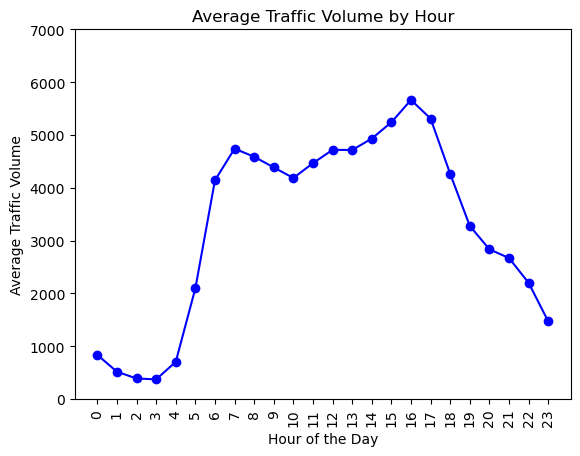

In [40]:
figsize = (10, 15)
hourly_traffic_volume.plot(kind='line', marker='o', color='blue')
plt.title('Average Traffic Volume by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Volume')
plt.xticks(range(0, 24, 1), rotation = 90)
plt.yticks(range(0,8000,1000))
plt.grid(False)
plt.show()

As depicted in the graph above, the average traffic volume experiences a notable surge starting from 6:00 in the morning, peaking around 8:00 AM before slightly tapering off to around 4000 vehicles by 10:00 AM. Subsequently, traffic volume ascends again, reaching its pinnacle at 4:00 PM in the evening, gradually subsiding thereafter. 


However, this representation offers only an overview based on average volume data. To conduct a more thorough analysis, delving deeper into the traffic volume statistics is imperative, particularly examining variations across each day of the week. Let us proceed to explore the traffic volume data in greater detail.

In [6]:
# Use Series.describe() to look up statistics about the traffic_volume column
traffic_volume_stats = traffic_data['traffic_volume'].describe()
# Print statistics
print("Statistics about the traffic_volume column:")
print(traffic_volume_stats)

Statistics about the traffic_volume column:
count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64


The above statistics offer a comprehensive overview of the volume distribution. The analysis of the traffic volume dataset provides valuable insights into the vehicular activity on the roads under consideration. On average, the recorded traffic volume stands at approximately 3259 vehicles, reflecting a moderate level of road usage. 

However, it's noteworthy that the traffic volume exhibits considerable variability, ranging from a minimum of 0 vehicles to a maximum of 7280 vehicles. Assessing the distribution, the median traffic volume is 3380 vehicles, indicating that half of the observations fall below this threshold, while the other half surpass it. This observation underscores the dynamic nature of traffic conditions, emphasizing the importance of understanding the diverse range of traffic scenarios encountered.

## Day Time Vs Night Time Traffic Volume Analysis


Next step, we will partition the data into daytime and nighttime segments to glean deeper insights.


In [140]:
# Define the conditions for daytime and nighttime

daytime_condition = (traffic_data['hour'] >= 5) & (traffic_data['hour'] < 19)  # Daytime: 5:00 AM to 7:00 PM

nighttime_condition = ~daytime_condition  # Nighttime: Outside daytime hours


# Filter the dataset to isolate daytime and nighttime data

daytime = traffic_data.copy()[daytime_condition]

nighttime = traffic_data.copy()[nighttime_condition]

print("Shape of Daytime Data:", daytime_data.shape)
print("Shape of Nighttime Data:", nighttime_data.shape)

Shape of Daytime Data: (28027, 12)
Shape of Nighttime Data: (20177, 12)


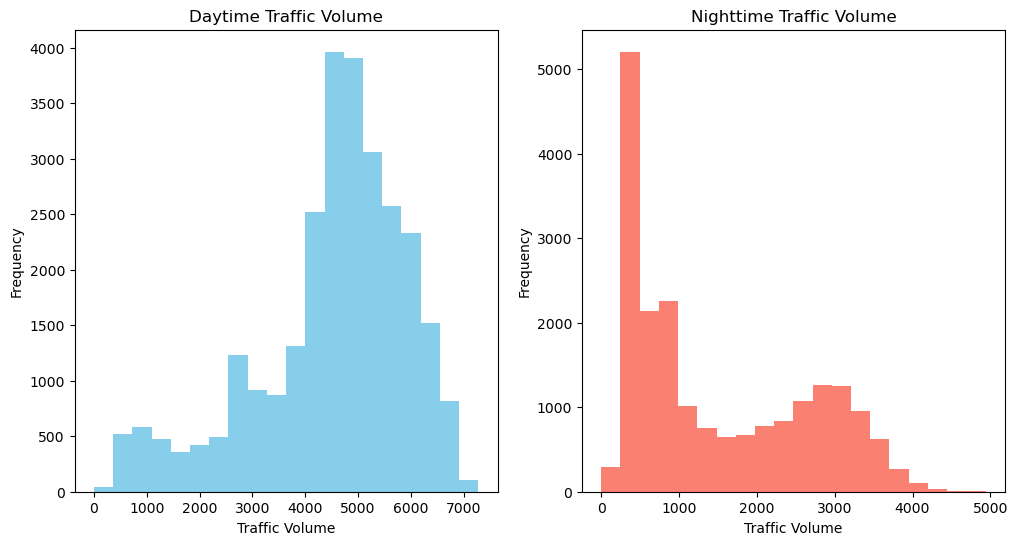

In [28]:
# Creating a figure and two subplots

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting histogram for daytime data

axs[0].hist(daytime['traffic_volume'], color = 'skyblue', bins = 20)
axs[0].set_title('Daytime Traffic Volume')
axs[0].set_xlabel('Traffic Volume')
axs[0].set_ylabel('Frequency')

# Plotting histogram for nighttime data

axs[1].hist(nighttime['traffic_volume'], color = 'salmon', bins = 20)
axs[1].set_title('Nighttime Traffic Volume')
axs[1].set_xlabel('Traffic Volume')
axs[1].set_ylabel('Frequency')

plt.show()


In [30]:
daytime['traffic_volume'].describe()

count    28027.000000
mean      4519.418525
std       1436.550188
min          0.000000
25%       3954.000000
50%       4757.000000
75%       5518.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [31]:
nighttime['traffic_volume'].describe()

count    20177.000000
mean      1510.162115
std       1139.877316
min          0.000000
25%        444.000000
50%       1024.000000
75%       2603.000000
max       4939.000000
Name: traffic_volume, dtype: float64

**Observations:**

- The daytime graph exhibits a left-skewed distribution, indicating a higher concentration of traffic volume during daytime hours.
- Conversely, the nighttime graph displays a right-skewed distribution, signifying lighter traffic during nighttime.
- The data underscores that traffic volume peaks during daytime hours, aligning with typical commuting patterns.


The statistics for daytime traffic volume reveal valuable insights into the typical traffic patterns observed during daylight hours:

There are 28,027 data points in the dataset, indicating the number of observations recorded for daytime traffic volume.

**Translating Above Statistical Observations**

**Average Traffic Volume**: The analysis reveals an average daytime traffic volume of approximately 4,519 vehicles.

**Variability**: Significant variability exists in traffic flow throughout the day, indicated by a standard deviation of approximately 1,437 vehicles. While 75% of the time, it is below 5,518 vehicles.

**Peak Traffic**: Maximum traffic volume peaks at 7,280 vehicles during daytime hours, illustrating the range of vehicular activity experienced on the road. 

### Weekdays vs Weekends Hourly Traffic Volume Analysis

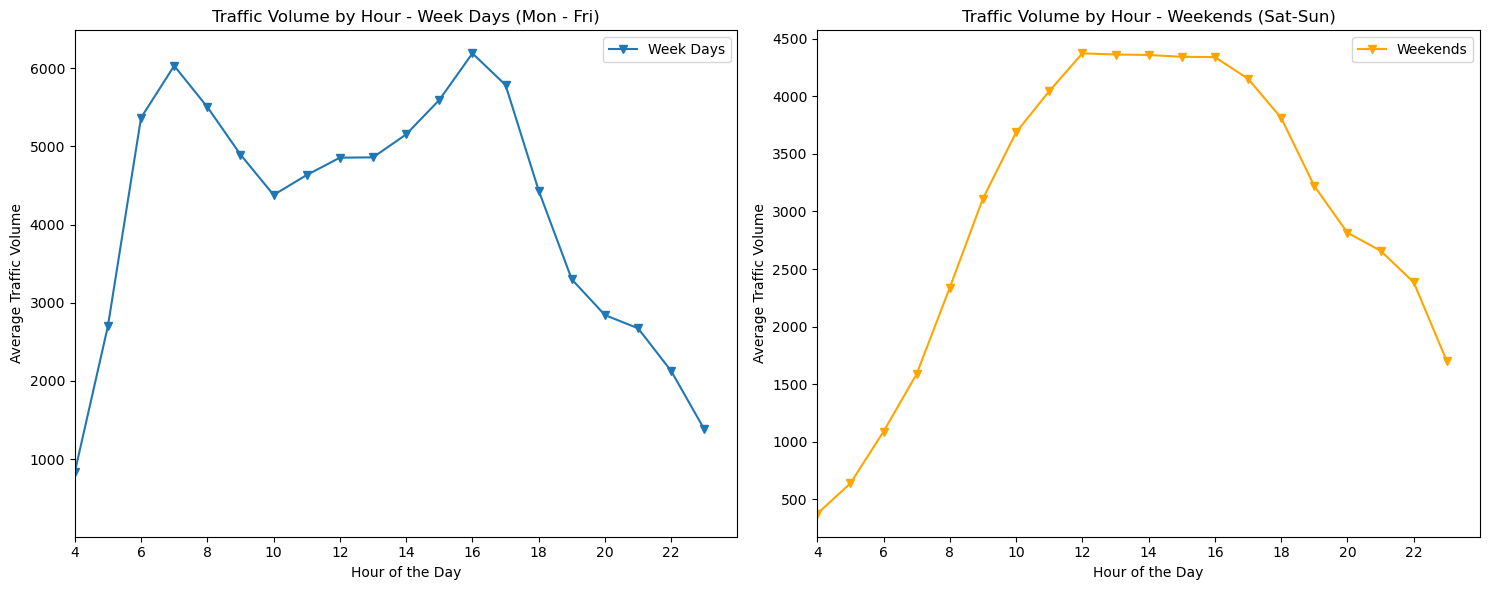

In [94]:
# Filter data for business days and weekends
business_days_data = traffic_data[traffic_data['day_of_week'] < 5]
weekends_data = traffic_data[traffic_data['day_of_week'] >= 5]


# Group traffic volume by hour for business days and weekends
business_days_traffic = business_days_data.groupby('hour')['traffic_volume'].mean()
weekends_traffic = weekends_data.groupby('hour')['traffic_volume'].mean()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot line graph for business days
axs[0].plot(business_days_traffic.index, business_days_traffic.values, label='Week Days', marker='v')
axs[0].set_title('Traffic Volume by Hour - Week Days (Mon - Fri)')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Average Traffic Volume')
axs[0].set_xticks(range(4, 24, 2)) 
axs[0].set_xlim(4, 24)
axs[0].legend()


# Plot line graph for weekends
axs[1].plot(weekends_traffic.index, weekends_traffic.values, label='Weekends', marker='v', color='orange')
axs[1].set_title('Traffic Volume by Hour - Weekends (Sat-Sun)')
axs[1].set_xlabel('Hour of the Day')
axs[1].set_ylabel('Average Traffic Volume')
axs[1].set_xticks(range(4, 24, 2)) 
axs[1].set_xlim(4, 24)
axs[1].legend()

plt.tight_layout()
plt.show()


**Observations**:

The visual insights gleaned from the graphs suggest that traffic volumes are higher during weekdays compared to weekends. On weekdays, peak traffic occurs at approximately 7:00 AM and 5:00 PM, with an average volume exceeding 6,000 vehicles. 

Moreover, the analysis revealed several temporal patterns indicative of heavy traffic:

1. Traffic tends to be heavier in warmer months (March–October) than in colder months (November–February).

2. Heavy traffic is more prominent on business days than on weekends.

3. Peak traffic congestion occurs around 7:00 AM and 5:00 PM on business days.

### Analysis of Traffic Volume by Month and Day of the Week

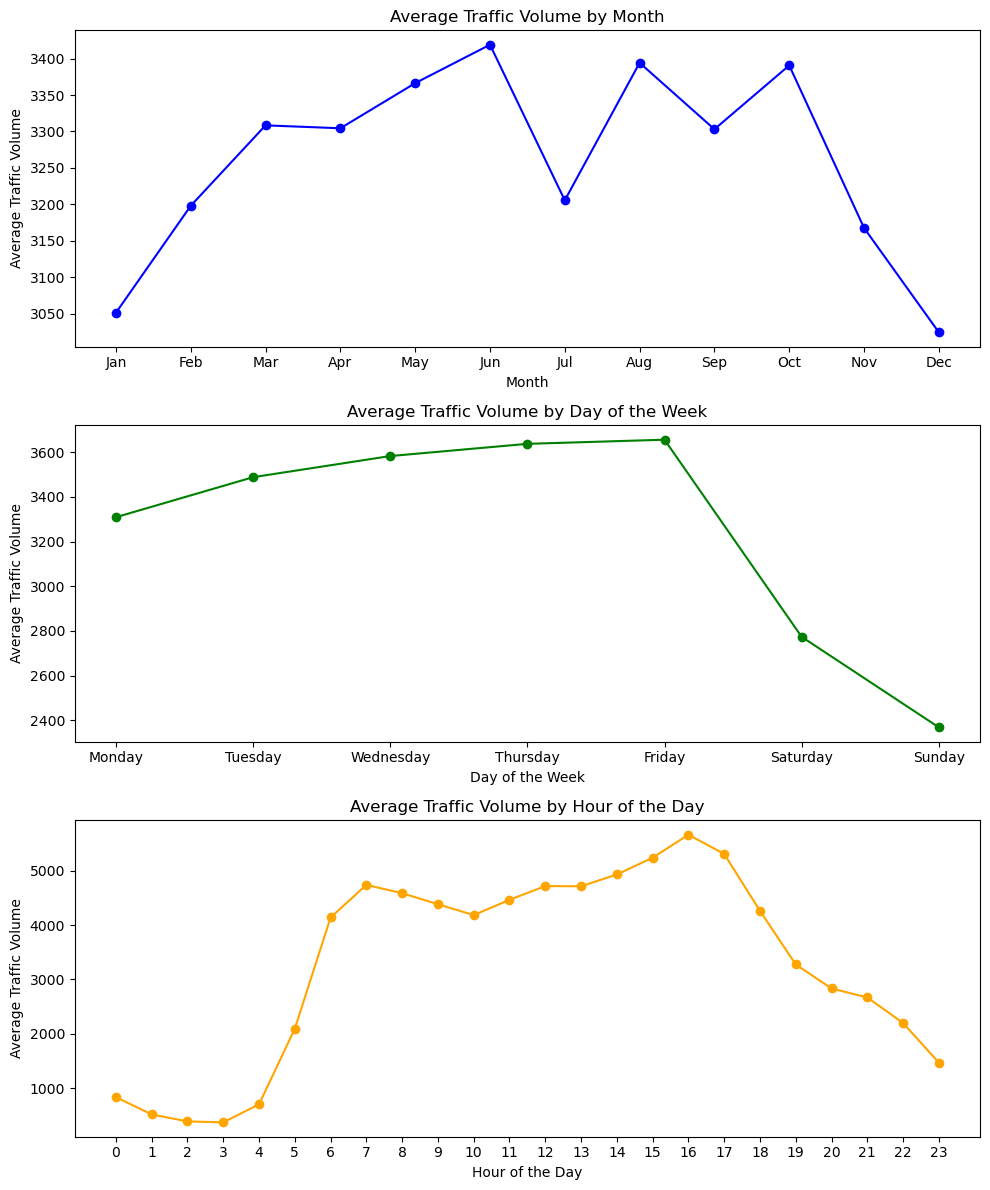

In [76]:
# Define a list of month names in the correct chronological order

month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
traffic_data['month_names'] = traffic_data['month'].map(month_names)

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


# Convert the 'month_names' column to an ordered categorical data type
traffic_data['month_names'] = pd.Categorical(traffic_data['month_names'], categories=month_order, ordered=True)

# Grouping the data by month names and calculate the average traffic volume
monthly_traffic_volume = traffic_data.groupby('month_names')['traffic_volume'].mean()


# Grouping the data by day of the week and calculate the average traffic volume

day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

traffic_data['day_names'] = traffic_data['day_of_week'].map(day_names)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

traffic_data['day_names'] = pd.Categorical(traffic_data['day_names'], categories=day_order, ordered=True)

weekly_traffic_volume = traffic_data.groupby('day_names')['traffic_volume'].mean()

# Hourly data is already grouped above

# Creating subplots for each analysis
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plotting for monthly traffic volume
axs[0].plot(monthly_traffic_volume.index, monthly_traffic_volume.values, marker='o', color='blue')
axs[0].set_title('Average Traffic Volume by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Average Traffic Volume')
axs[0].set_xticks(monthly_traffic_volume.index)


# Plotting for weekly traffic volume
axs[1].plot(weekly_traffic_volume.index, weekly_traffic_volume.values, marker='o', color='green')
axs[1].set_title('Average Traffic Volume by Day of the Week')
axs[1].set_xlabel('Day of the Week')
axs[1].set_ylabel('Average Traffic Volume')
axs[1].set_xticks(weekly_traffic_volume.index)



# Plotting for hourly traffic volume
axs[2].plot(hourly_traffic_volume.index, hourly_traffic_volume.values, marker='o', color='orange')
axs[2].set_title('Average Traffic Volume by Hour of the Day')
axs[2].set_xlabel('Hour of the Day')
axs[2].set_ylabel('Average Traffic Volume')
axs[2].set_xticks(hourly_traffic_volume.index)




plt.tight_layout()

plt.show()

The analysis indicates that traffic volumes are lower during the months of November to February, while weekdays consistently exhibit higher mean traffic volumes. To delve deeper into the data, focusing on hourly traffic volumes would offer a more nuanced understanding, facilitating the segmentation and analysis of traffic patterns with greater detail and precision.

We will deep dive this data further, by seggregating the data into weekdays and weekends and observe any simialrity in traffic volume patterns

### Weekdays Hourly Traffic Analysis on Warmer Months

In [128]:
# Warmer months business days hourly data exploration

# Isolate warmer months data during weekdays
warmer_months_weekdays = traffic_data[traffic_data['month'].between(3,10) & (traffic_data['day_of_week'] <= 4)]

# Isolate the data for daytime hours using .loc
warmer_month_traffic = warmer_months_weekday.loc[daytime_condition].groupby(['month', 'hour'])['traffic_volume'].mean().reset_index()


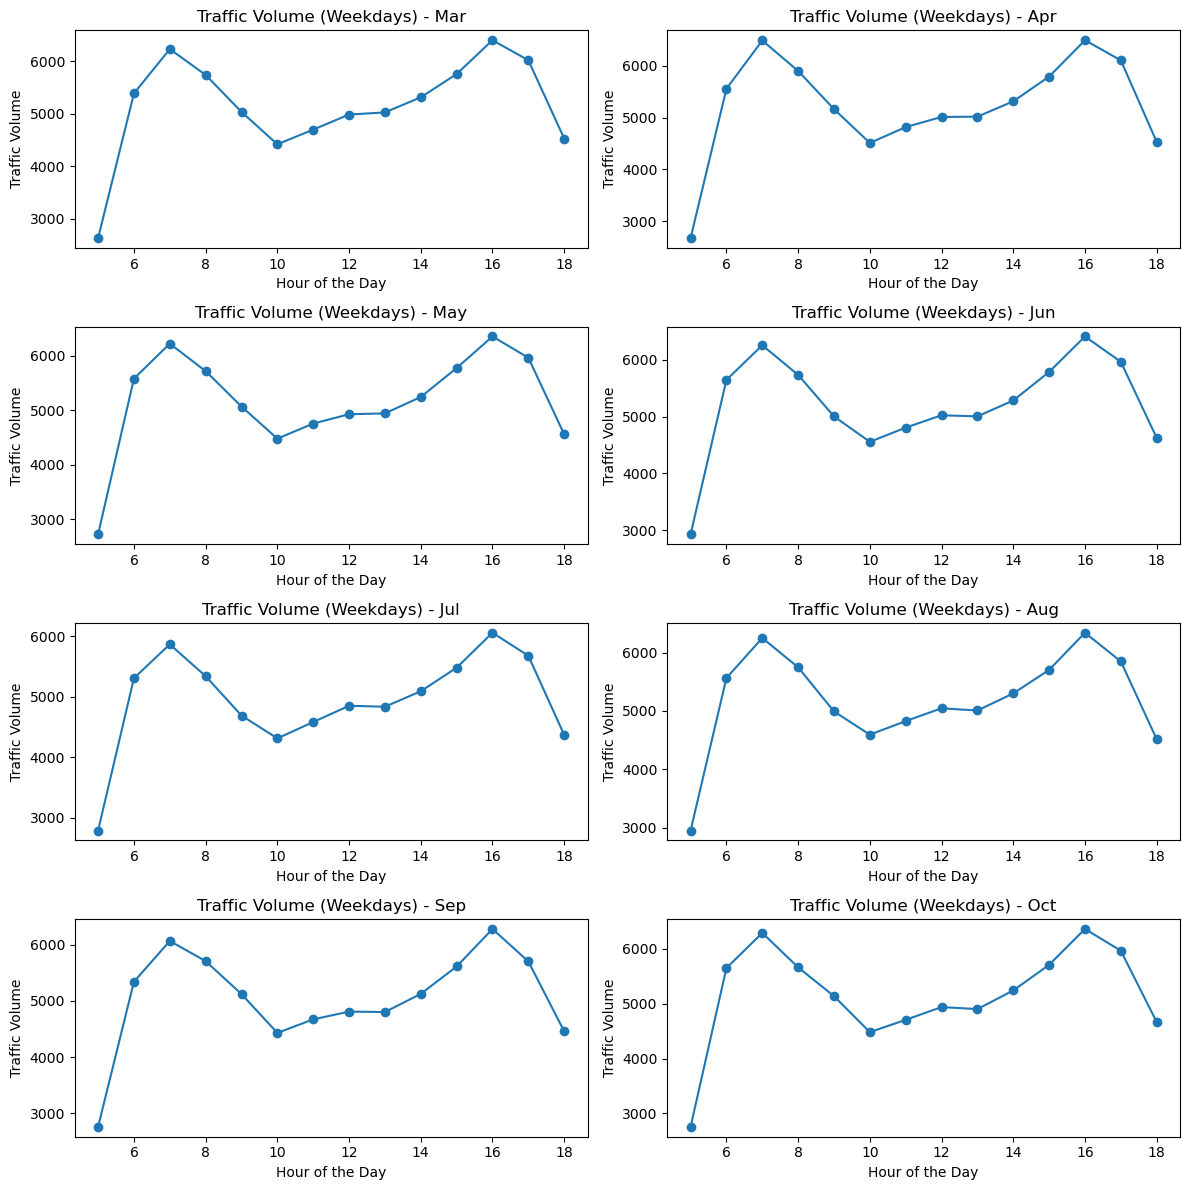

In [129]:
# Subplots for each warmer month

fig, axs = plt.subplots(4, 2, figsize = (12, 12))

for i, month in enumerate(range(3,11)):
    row = i // 2
    col = i % 2
    month_data = warmer_month_traffic[warmer_month_traffic['month'] == month]
    axs[row, col].plot(month_data['hour'], month_data['traffic_volume'], marker = 'o')
    axs[row, col].set_title(f'Traffic Volume (Weekdays) - {month_names[month]}')
    axs[row, col].set_xlabel('Hour of the Day')
    axs[row, col].set_ylabel('Traffic Volume')
    
plt.tight_layout()
plt.show()

The above graphs help us to identify that hourly traffic volume during warmer months follow a similar pattern. Let's delve into daily traffic volume for each day.

### Identification of Busier Weekdays

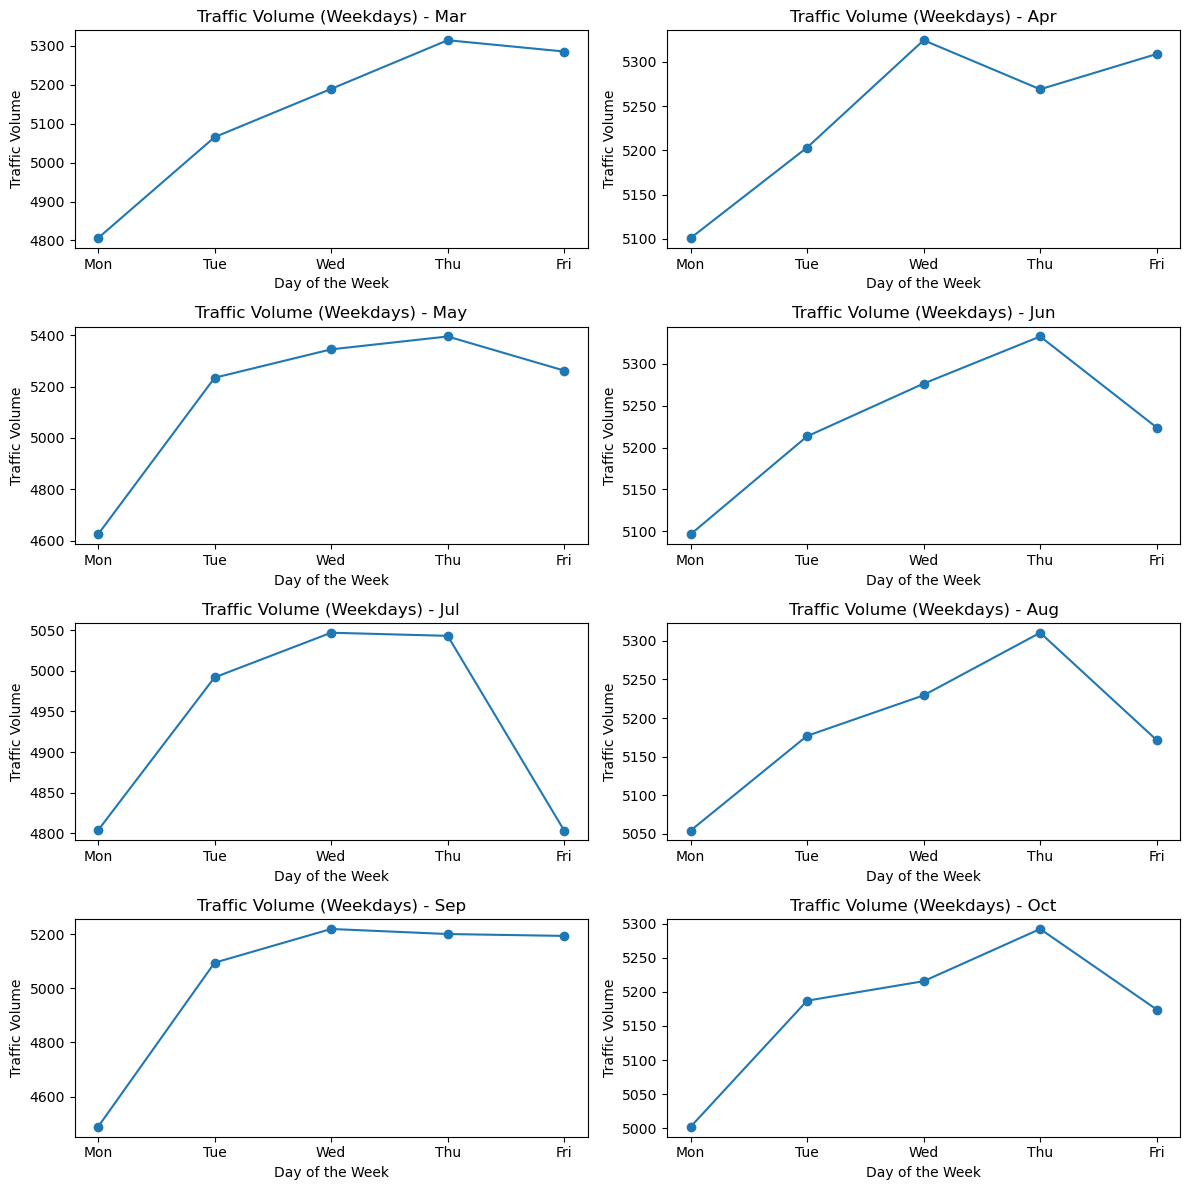

In [130]:
# Warmer months business days daily traffic data exploration

# Isolate the data for daytime hours using .loc
warmer_month_weekdays_traffic = warmer_months_weekdays.loc[daytime_condition].groupby(['month', 'day_of_week'])['traffic_volume'].mean().reset_index()

# Replace numerical weekday values with their names
# day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
warmer_month_weekdays_traffic['day_of_week'] = warmer_month_weekdays_traffic['day_of_week'].map(day_names)

# Subplots for each warmer month
fig, axs = plt.subplots(4, 2, figsize=(12, 12))

for i, month in enumerate(range(3,11)):
    row = i // 2
    col = i % 2
    month_data = warmer_month_weekdays_traffic[warmer_month_weekdays_traffic['month'] == month]
    axs[row, col].plot(month_data['day_of_week'], month_data['traffic_volume'], marker='o')
    axs[row, col].set_title(f'Traffic Volume (Weekdays) - {month_names[month]}')
    axs[row, col].set_xlabel('Day of the Week')
    axs[row, col].set_ylabel('Traffic Volume')

plt.tight_layout()
plt.show()


The analysis of the graphs reveals distinct patterns across different months:

- **March to June**: _**Thursdays**_ exhibited heavy traffic volume, averaging nearly 5400 vehicles.

- **July**: _**Wednesdays and Thursdays**_ experienced greater traffic volume, with an average volume exceeding 5000 vehicles.

- **August, September, and October**: _**Thursdays**_ recorded higher mean traffic volume, surpassing 5300 vehicles. In _September_, traffic volumes on _**Wednesday, Thursday, and Friday**_ were nearly 5200 vehicles.


**Overall, Wednesdays, Thursdays and Fridays emerge as heavy traffic volume days mostly across all the observed months.**



# 2. Weather Indicators

Another avenue to explore heavy traffic indicators is through weather conditions. The dataset includes several columns pertaining to weather, such as temperature, rainfall, snowfall, cloud cover, weather type, and weather description.

Let's begin by examining the correlation values between these weather parameters and traffic volume to identify potential relationships.

Temperature exhibits positive correlation, with a coefficient of 0.14, among other variables. However, this correlation value is relatively low, indicating that there might not be a strong linear relationship between temperature and traffic volume. As a result, further exploration of temperature's impact on traffic volume may not yield significant insights.

To explore potential indicators further, the focus will shift to categorical weather-related columns: weather_main and weather_description. These columns may provide more useful data for identifying heavy traffic indicators.

In [143]:
by_weather_main = daytime.groupby('weather_main').mean(numeric_only=True)

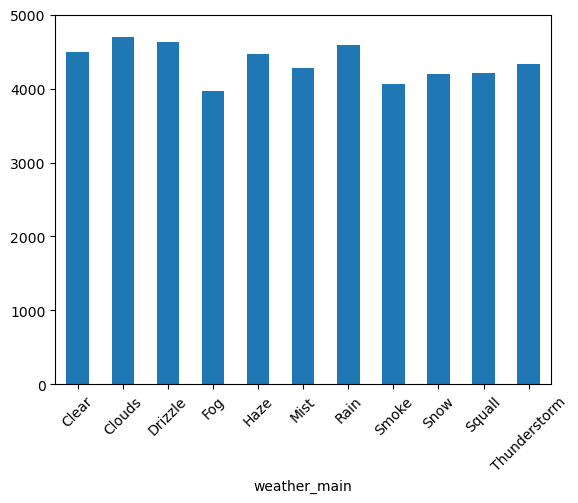

In [159]:
by_weather_main['traffic_volume'].plot.bar()
plt.xticks(rotation=45)
plt.ylim(0, 5000)
plt.show()

Upon examination, it appears that no specific weather type corresponds to traffic volumes exceeding 5,000 cars. This lack of a clear correlation complicates the identification of heavy traffic indicators based solely on weather conditions. 

To gain more insight, further analysing the data by grouping it based on the more detailed weather_description column, offers a more nuanced classification of weather conditions.


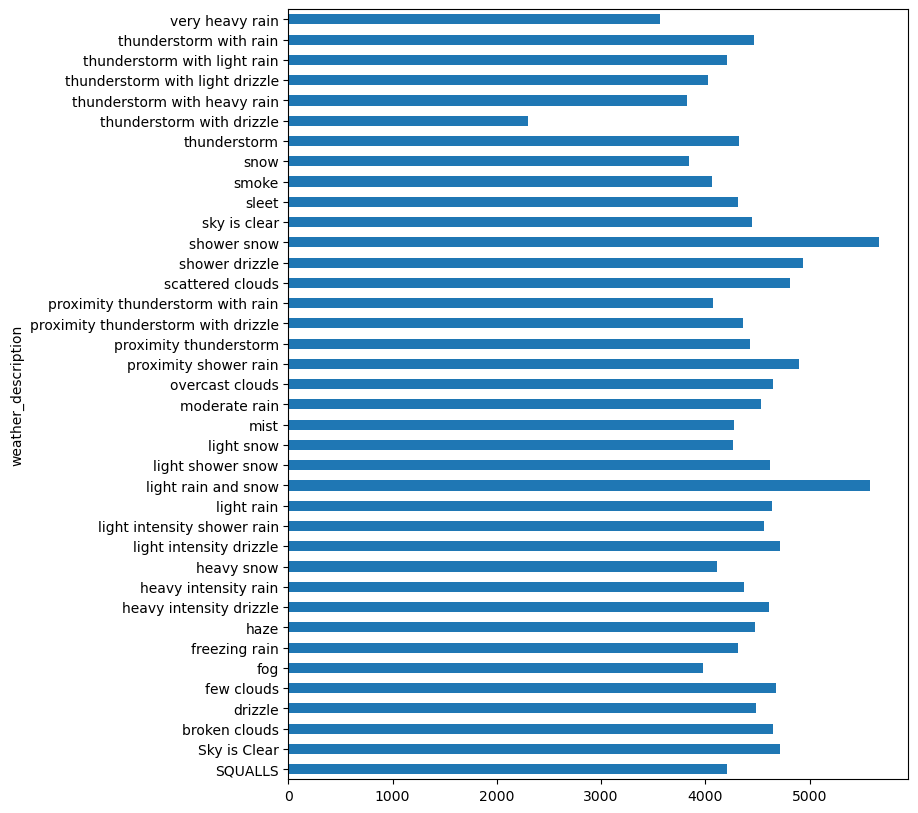

In [164]:
by_weather_description = daytime.groupby('weather_description').mean(numeric_only=True)
by_weather_description['traffic_volume'].plot.barh(figsize = (8, 10))

plt.show()

The graph above highlights that specific weather conditions, including 'shower snow,' 'light rain and snow,' and 'proximity shower rain,' coincide with heavy traffic, where the traffic volume surpasses 5000 vehicles.


This suggests that adverse weather conditions could potentially contribute to traffic congestion, possibly due to altered driving behaviors as individuals exercise caution while navigating challenging road conditions.

# Conclusion and Practical Implications

The analysis of traffic indicators on the I-94 Interstate highway reveals significant insights that can inform real-world decision-making processes. Here's a summary of the key findings and their practical implications:


1. **Time indicators**
    - **Heavy Traffic During Warm Months**: The data shows a consistent trend of heavier traffic volumes during the warmer months (March–October) compared to the colder months (November–February). This information is valuable for transportation authorities and urban planners, who can anticipate increased traffic congestion during these periods and implement appropriate measures to manage traffic flow more effectively.
    - **Weekday vs. Weekend Traffic**: The analysis confirms that traffic is typically heavier on business days compared to weekends. This finding underscores the importance of considering weekday traffic patterns when designing transportation policies and infrastructure projects.
    - **Rush Hours**: The identified rush hours around 7 AM and 5 PM on business days highlight critical periods of heightened traffic activity. This insight can guide commuters in planning their travel times to avoid peak congestion, as well as aid transportation agencies in optimizing traffic management strategies during these peak periods.

Further, Wednesdays, Thursdays and Fridays exhibit heavier traffic during most of the months.

2. **Weather indicators**
    - **Impact of Weather Conditions**: The analysis identifies specific weather conditions such as shower snow, light rain and snow, and proximity shower rain as correlating with heavy traffic volumes exceeding 5000 vehicles. This suggests that adverse weather conditions can significantly impact traffic flow, potentially leading to congestion and slower travel times. Shower snow


In conclusion, the insights derived from this analysis provide valuable information for stakeholders involved in traffic management, urban planning, and commuter decision-making. By understanding the underlying factors influencing traffic patterns, policymakers and transportation agencies can develop more effective strategies to enhance road safety, optimize traffic flow, and improve overall mobility on the I-94 Interstate highway and similar road networks.